# CPS 803 / CP 8318 Assignment 2
## CPS 803 [30 Marks]
## CP 8318 [36 Marks]

## Import libraries

In [204]:
import numpy as np
import matplotlib.pyplot as plt
# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [205]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [206]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [207]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


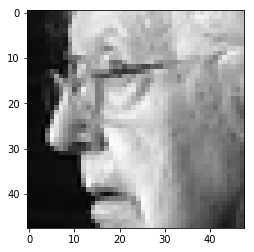

facial emotion: neutral


In [208]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [209]:
# YOUR CODE HERE

x_happy_sad_training=[]
y_happy_sad_training=[]

x_happy_sad_testing=[]
y_happy_sad_testing=[]

#1 = Happy
#0 = Sad


for i in range(len(x_training)):
    #If the result is Happy
    if y_training[i][3]==1:
        x_happy_sad_training.append(x_training[i])
        y_happy_sad_training.append(1)
    #If the result is Sad
    elif y_training[i][4]==1:
        x_happy_sad_training.append(x_training[i])
        y_happy_sad_training.append(0)

        
for i in range(len(x_testing)):
     #If the result is Happy
    if y_testing[i][3]==1:
        x_happy_sad_testing.append(x_testing[i])
        y_happy_sad_testing.append(1)
    #If the result is Sad
    elif y_testing[i][4]==1:
        x_happy_sad_testing.append(x_testing[i])
        y_happy_sad_testing.append(0)    
        
        
        

print(y_happy_sad_training[:20])
print(y_happy_sad_testing[:20])
print(len(y_happy_sad_training))
print(len(x_happy_sad_training))
print(len(y_happy_sad_testing))
print(len(x_happy_sad_testing))

#print(x_happy_sad[0:2])

[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0]
[0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0]
12045
12045
1548
1548


[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

In [210]:
print(len(x_happy_sad_training))
print(len(x_happy_sad_testing))

12045
1548


In [211]:
# YOUR CODE HERE
#Resize to not be 3 dimensions
x_happy_sad_training = np.array(x_happy_sad_training).reshape(12045,48*48)
x_happy_sad_testing = np.array(x_happy_sad_testing).reshape(1548,48*48)


576
(12045, 576)
(1548, 576)


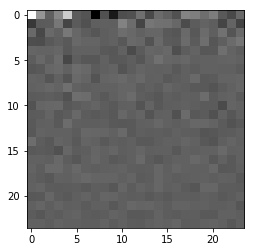

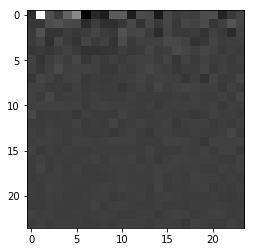

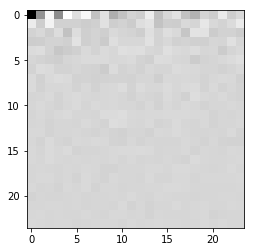

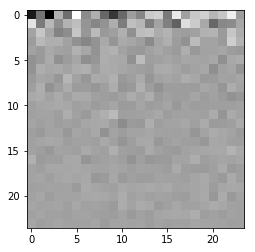

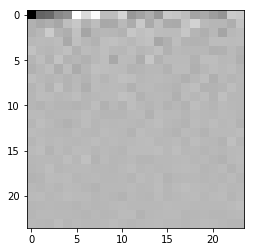

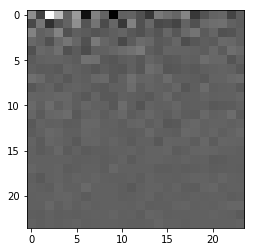

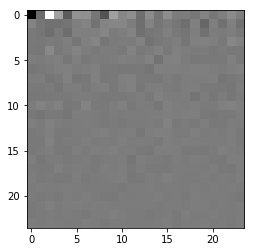

In [212]:
#PCA
from sklearn.decomposition import PCA

new_size = 24
pca = PCA(n_components =new_size*new_size)
pComponents = pca.fit(x_happy_sad_training)

x_happy_sad_trainingPCA = pca.transform(x_happy_sad_training)
x_happy_sad_testingPCA = pca.transform(x_happy_sad_testing)

print(pca.n_components_)
print(x_happy_sad_trainingPCA.shape)
print(x_happy_sad_testingPCA.shape)

for i in range(7):
    randIndex = np.random.randint(0,1000)
    sample1 = x_happy_sad_trainingPCA[randIndex]
    sample1 = sample1.reshape(new_size, new_size)

    plt.imshow(sample1, cmap='gray')
    plt.show()
    


In [213]:
# #LDA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# new_size = 24
# lda = LinearDiscriminantAnalysis() #n_components =new_size*new_size
# pComponentsLDA = lda.fit(x_happy_sad_training,y_happy_sad_training)

# x_happy_sad_trainingLDA = lda.transform(x_happy_sad_training)
# x_happy_sad_testingLDA = lda.transform(x_happy_sad_testing)

# #print(len(lda[0]))
# print(x_happy_sad_trainingLDA.shape)
# print(x_happy_sad_testingLDA.shape)

# for i in range(7):
#     randIndex = np.random.randint(0,1000)
#     sample1 = x_happy_sad_trainingLDA[randIndex]
#     print(sample1)
#     sample1 = sample1.reshape(new_size, new_size)

#     plt.imshow(sample1, cmap='gray')
#     plt.show()

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [214]:
# YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

x_happy_sad_trainingNB = pca.transform(x_happy_sad_training)
x_happy_sad_testingNB = pca.transform(x_happy_sad_testing)

NBModel = GaussianNB()
NBModel.fit(x_happy_sad_trainingNB, y_happy_sad_training)

NB_preds = NBModel.predict(x_happy_sad_testingNB)

print(accuracy_score(y_happy_sad_testing,NB_preds))
print(classification_report(y_happy_sad_testing,NB_preds))


0.5684754521963824
              precision    recall  f1-score   support

           0       0.49      0.41      0.44       653
           1       0.61      0.68      0.65       895

   micro avg       0.57      0.57      0.57      1548
   macro avg       0.55      0.55      0.55      1548
weighted avg       0.56      0.57      0.56      1548



Naive Bays
Accuracy: ~56%


[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [215]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

x_happy_sad_trainingLR = pca.transform(x_happy_sad_training)
x_happy_sad_testingLR = pca.transform(x_happy_sad_testing)

lr = LogisticRegression(random_state=0)
lr.fit(x_happy_sad_trainingLR, y_happy_sad_training)
lr_preds = lr.predict(x_happy_sad_testingLR)

print(accuracy_score(y_happy_sad_testing,lr_preds))
print(classification_report(y_happy_sad_testing,lr_preds))

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7183462532299741
              precision    recall  f1-score   support

           0       0.70      0.58      0.64       653
           1       0.73      0.82      0.77       895

   micro avg       0.72      0.72      0.72      1548
   macro avg       0.71      0.70      0.70      1548
weighted avg       0.72      0.72      0.71      1548



Logistic Regression
Accuracy: ~72%

[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [216]:
# YOUR CODE HERE
from sklearn import svm

x_happy_sad_trainingSVM = pca.transform(x_happy_sad_training)
x_happy_sad_testingSVM = pca.transform(x_happy_sad_testing)

svm_model = svm.SVC(gamma='scale')
svm_model.fit(x_happy_sad_trainingSVM, y_happy_sad_training)
svm_preds = svm_model.predict(x_happy_sad_testingSVM)

print(accuracy_score(y_happy_sad_testing,svm_preds))
print(classification_report(y_happy_sad_testing,svm_preds))

0.7409560723514211
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       653
           1       0.75      0.83      0.79       895

   micro avg       0.74      0.74      0.74      1548
   macro avg       0.74      0.72      0.73      1548
weighted avg       0.74      0.74      0.74      1548



Support Vector Machine Accuracy: ~74%

[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

Support vector machine and Logistic regression have the highest accuracy at around 73%. I trust SVM the most because it is good at separating groups of pixels using the support vectors. Logistic regression may have trouble separating clusters vertically where svm can have support vectors with infinitely many slopes to accomadate the different patterns in the pixels.

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [35]:
# YOUR CODE HERE

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [36]:
# YOUR CODE HERE



[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [37]:
# YOUR CODE HERE

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [38]:
# YOUR CODE HERE

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [39]:
# YOUR CODE HERE

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [40]:
# YOUR CODE HERE

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [41]:
# YOUR CODE HERE

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

In [42]:
# YOUR CODE HERE

# 8318 only

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[6 Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [43]:
# YOUR CODE HERE